In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,9)
import numpy as np
import ipywidgets as widgets
import matplotlib.animation as animation
from PIL import Image
from matplotlib import cm
import tqdm
import matplotlib.gridspec as gridspec

## Create images

In [2]:
x = 40
y = 40
list_frames = []

for i in tqdm.tqdm(range(500)):
    list_frames.append(np.random.randint(low=0,high=255,size =(x,y)))
    
    


100%|██████████| 500/500 [00:00<00:00, 21639.09it/s]


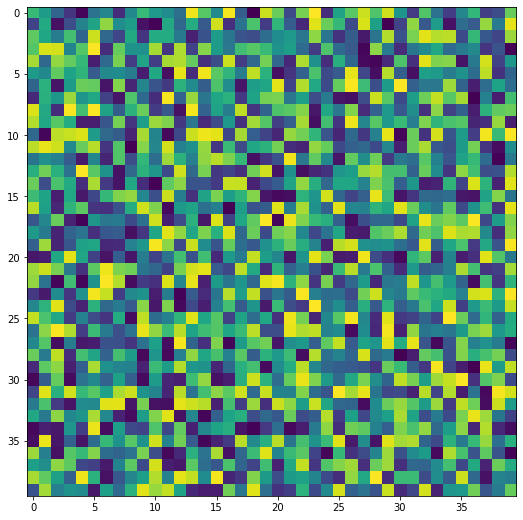

In [3]:
plt.imshow(list_frames[0])

## GIF - Method 1

## Convert to Pil Image

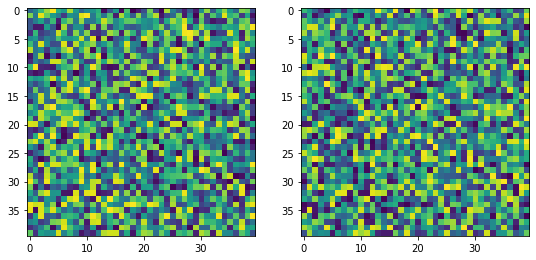

In [4]:
imag = Image.fromarray(np.uint8((list_frames[0])*255))

plt.subplot(1,2,1)
plt.imshow(imag)
plt.subplot(1,2,2)
plt.imshow(list_frames[0])

In [5]:
img = []

for i in tqdm.tqdm(range(len(list_frames))):
    img.append(Image.fromarray(np.uint8(cm.gist_earth(list_frames[i])*255)))

100%|██████████| 500/500 [00:00<00:00, 5241.43it/s]


## Save as Gif

In [6]:
img[0].save('imagedraw.gif',
               save_all=True, append_images=img[1:], optimize=False, duration=20, loop=0)

## GIF - Method 2

save actual plot

In [7]:
def fig2img(fig):
    """Convert a Matplotlib figure to a PIL Image and return it"""
    import io
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)
    return img

In [8]:
def plot_img(array, i):
    plt.imshow(array[i])
    fig = plt.gcf()
    plt.close()
    return fig

In [9]:
img = []

for i in tqdm.tqdm(range(len(list_frames))):
    img.append(fig2img(plot_img(list_frames, i)))
    
    

100%|██████████| 500/500 [01:05<00:00,  7.63it/s]


In [10]:
img[0].save('/mnt/data/img.gif',
               save_all=True, append_images=img[1:], optimize=False, duration=100, loop=0)

## Interactive plots

In [6]:
def plot_img(array, i):
    plt.imshow(array[i])
    

In [7]:
widgets.interact(plot_img,
                array = widgets.fixed(list_frames),
                i = widgets.IntSlider(value=0,min=0,max =(len(list_frames)-1),step=1,description='Frame N:',orientation='horizontal'))

interactive(children=(IntSlider(value=0, description='Frame N:', max=499), Output()), _dom_classes=('widget-in…

<function __main__.plot_img(array, i)>

In [10]:
np.shape(list_frames)

(500, 40, 40)

In [8]:
widgets.interact(plot_img,
                array = widgets.fixed(list_frames),
                i = widgets.BoundedIntText(value=0,min=0,max =(len(list_frames)-1),step=1,description='Frame N:',orientation='horizontal'))

interactive(children=(BoundedIntText(value=0, description='Frame N:', max=499), Output()), _dom_classes=('widg…

<function __main__.plot_img(array, i)>

## Subplots with interactive plots

In [11]:
def sub_interact_plot(array, n_sub, i):
    
    
        # gridspec inside gridspec
    f = plt.figure()

    gs0 = gridspec.GridSpec(1, 2, figure=f)

    gs00 = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs0[0])

    ax1 = f.add_subplot(gs00[:, :])
    
    ax1.imshow(array[i])
    
    
    cols = 2
    rows = int(np.ceil(n_sub/2))



    gs01 = gs0[1].subgridspec(rows, cols)

    for col in range(cols):
        for row in range(rows):
            f.add_subplot(gs01[row, col])
    
    for i, ax in enumerate(f.axes):
        if i>0:
            lbl = "frame"+str(i-1)
            ax.imshow(array[i-1])
            
plt.show()

In [12]:
widgets.interact(sub_interact_plot,
                array = widgets.fixed(list_frames),
                n_sub = widgets.fixed(6),
                i = widgets.IntSlider(value=0,min=0,max =(len(list_frames)-1),step=1,description='Frame N:',orientation='horizontal'))

interactive(children=(IntSlider(value=0, description='Frame N:', max=499), Output()), _dom_classes=('widget-in…

<function __main__.sub_interact_plot(array, n_sub, i)>